# Вагонопоток
```
Дата создания: 09.09.2023
Дата последней корректировки: 10.09.2023
Автор: Рудницкий С.Ф.
```

## Решение задачи о вагонопотоке

In [40]:
#!pip install pandas
#!pip install deap
#!pip install numpy
#!pip install matplotlib
#!pip install seaborn
#!pip install openpyxl

In [41]:
# Функция расчета разницы времени
def calculate_timedelta(interval):
    start_time, end_time = interval.split(" - ")
    start_time = datetime.datetime.strptime(start_time, "%H:%M")
    end_time = datetime.datetime.strptime(end_time, "%H:%M")
    
    if end_time < start_time:
        end_time += datetime.timedelta(days=1)  # Добавляем 1 день к конечному времени, если оно меньше начального времени
    
    delta = end_time - start_time
    delta_hours = delta.seconds // 3600
    delta_minutes = (delta.seconds // 60) % 60
    
    return delta_hours*60 + delta_minutes

In [42]:
#print(calculate_timedelta("04:48 - 06:11"))

In [44]:
def get_results(train_list, case):

    dcolumns = ['Номер станции', 'Станция', 'Событие', 'Станция отправления', 'Станция назначения', 'Вагонов', 'Вагонов по плану']
    df = pd.DataFrame(columns=dcolumns)

    data = dict()

    # Составляем кодификатор станций
    name_stations = []
    stations = case['stations']
    for key, value in stations.items():
        name_stations.append(key)

    # Составляем таблицу планов 
    plans = []
    for key, value in stations.items():
        value_new = []
        for i in range(len(value)):
            elem = int(value[i])
            value_new.append(elem)
        plans.append(value_new)

    # Готовим таблицу расписаний
    full_timetable = case['full_timetable']
    for train_number in train_list:
        train = full_timetable[train_number]
        #print(train_number, train)
        route = train['route']
        free_carriage = train['free_carriage']
        timetable = train['timetable']
        #print(train_number, route)
        data['Маршрут'] = train_number
        for i in range(len(route)):
            data['Номер станции'] = route[i]           
            data['Станция'] = name_stations[int(route[i])-1]
            if i == 0:
                data['Время'] = timetable[i]
                data['Событие'] = 'Отбытие'
                data['Станция отправления'] = None
                data['Станция назначения'] = name_stations[int(route[i+1])-1]
                data['Вагонов'] = free_carriage[i]
                data['Вагонов по плану'] = plans[int(route[i])-1][int(route[i+1])-1]
                row2df = pd.DataFrame.from_records([data])
                df = pd.concat([df, row2df], ignore_index=True, axis=0)
            elif i == len(route)-1:
                data['Время'] = timetable[i]
                data['Событие'] = 'Прибытие'
                data['Станция отправления'] = name_stations[int(route[i-1])-1]
                data['Станция назначения'] = None
                data['Вагонов'] = free_carriage[i-1]
                data['Вагонов по плану'] = plans[int(route[i-1])-1][int(route[i])-1]
                row2df = pd.DataFrame.from_records([data])
                df = pd.concat([df, row2df], ignore_index=True, axis=0)
            else:
                data['Время'] = timetable[i]
                data['Событие'] = 'Прибытие'
                data['Станция отправления'] = name_stations[int(route[i-1])-1]
                data['Станция назначения'] = None
                data['Вагонов'] = free_carriage[i-1]
                data['Вагонов по плану'] = plans[int(route[i-1])-1][int(route[i])-1]
                row2df = pd.DataFrame.from_records([data])
                df = pd.concat([df, row2df], ignore_index=True, axis=0)
                
                data['Время'] = timetable[i]
                data['Событие'] = 'Отбытие'
                data['Станция отправления'] = None
                data['Станция назначения'] = name_stations[int(route[i+1])-1]
                data['Вагонов'] = free_carriage[i-1]
                data['Вагонов по плану'] = plans[int(route[i])-1][int(route[i+1])-1]
                row2df = pd.DataFrame.from_records([data])
                df = pd.concat([df, row2df], ignore_index=True, axis=0)
    
    return df                

L:\!ML_work\!ML00_hacks_ai_Всерос\.ML_hacks_ai_2023\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
L:\!ML_work\!ML00_hacks_ai_Всерос\.ML_hacks_ai_2023\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


-- Лучшее решение =  [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0]
-- Лучшая приспособленность =  239.0 3166.0
-- Ситуация = 
- Добавлен маршрут 563: вагонов = 91, времени = 271, вагоны нарастающим итогом = 91, время нарастающим итогом = 271
- Добавлен маршрут 658: вагонов = 100, времени = 343, вагоны нарастающим итогом = 191, время нарастающим итогом = 614
- Добавлен маршрут 275: вагонов = 38, времени = 139, вагоны нарастающим итогом = 229, время нарастающим итогом = 753
- Добавлен маршрут 371: вагонов = 12, времени = 82, вагоны нарастающим итогом = 241, время нарастающим итогом = 835
- Добавлен маршрут 323: вагонов = 58, времени = 216, вагоны нарастающим итогом = 299, время нарастающим итогом = 1051
- Добавлен маршрут 177: вагонов = 35, времени = 222, вагоны нарастающим итогом = 334, время нарастающим итогом = 1273
- Добавлен маршрут 223: вагонов = 8, времени = 112, вагоны нарастающим итогом = 342, вр

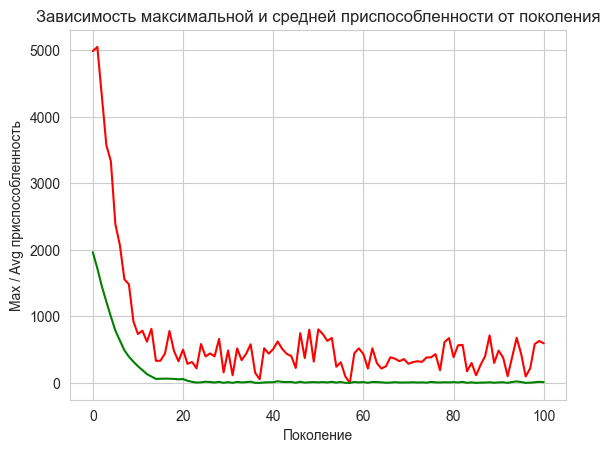

Расписание сформировано в файле 'Расписание.xlsx'
== Работа программы завершена ==


In [46]:
from deap import base
from deap import creator
from deap import tools
from deap import algorithms

import random
import numpy as np
import pandas as pd
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

POPULATION_SIZE = 50
P_CROSSOVER = 0.9  
P_MUTATION = 0.1   
MAX_GENERATIONS = 100
HALL_OF_FAME_SIZE = 3
PENALTY = 2

RANDOM_SEED = 42
random.seed(RANDOM_SEED)

class RailWagonTrafficProblem:
    """Класс для задачи вагонопотока
    """

    def __init__(self, full_timetable, stations):
        self.name_stations = []
        self.items = []
        self.plans = [] # Задание, с какой станции и куда что нужно перевести
        self.facts = [] # Фактическое состояние, сколько реально перевезено
        self.time_stations = [] # Потраченное время на подготовку к перевозке
        #self.maxCapacity = 0

        self.__initData(full_timetable, stations)

    def __len__(self):
        """
        :return: общее количество элементов, определенных в задаче
        """
        return len(self.items)

    def __initData(self, full_timetable, stations):
        """Инициализация первоначальных данных
        """
        self.items = []
        
        for key, value in full_timetable.items():
            route = value['route']
            route_new = []
            for i in range(len(route)):
                elem = int(route[i]) - 1
                route_new.append(elem)
                
            free_carriage = value['free_carriage']
            free_carriage_new = []
            for i in range(len(free_carriage)):
                elem = int(free_carriage[i])
                free_carriage_new.append(elem)
                
            timetable = value['timetable']
            timetable_new = []
            for i in range(len(timetable)):
                elem = calculate_timedelta(timetable[i])
                timetable_new.append(elem)
            
            self.items.append((key, route_new, free_carriage_new, timetable_new))
        #print(self.items) # RSF

        #print(stations) # RSF
        self.plans = []
        self.facts = []

        for key, value in stations.items():
            self.name_stations.append(key)
            self.time_stations.append(0)
            value_new = []
            fact_new = []
            for i in range(len(value)):
                elem = int(value[i])
                value_new.append(elem)
                fact_new.append(0)
            self.plans.append(value_new)
            self.facts.append(fact_new)
        
        #print(self.plans) # RSF
        #print(self.facts) # RSF

    def getValue(self, zeroOneList):

        totalWagon = totalTime = 0

        for i in range(len(zeroOneList)):
            if zeroOneList[i] > 0:
                train_number, route, free_carriage, timetable = self.items[i]
                for i in range(len(route)):
                    self.time_stations[route[i]] += timetable[i]
                    totalTime += timetable[i]
                    if i > 0:
                        if self.facts[route[i-1]][route[i]] + free_carriage[i-1] <= self.plans[route[i-1]][route[i]]:
                            totalWagon += free_carriage[i-1]
                            self.facts[route[i-1]][route[i]] += free_carriage[i-1]    
                        else:    
                            totalWagon += (self.plans[route[i-1]][route[i]]- self.facts[route[i-1]][route[i]])
                            self.facts[route[i-1]][route[i]] = self.plans[route[i-1]][route[i]]
                #print(train_number)
                #print(f"Планы: {self.plans}") # RSF
                #print(f"Факты: {self.facts}") # RSF
                            
        return totalWagon, totalTime # RSF

    def printItems(self, zeroOneList):

        train_list = []
        totalWagon = totalTime = 0

        for i in range(len(zeroOneList)):
            wagon_route = 0
            time_route = 0
            if zeroOneList[i] > 0:
                train_number, route, free_carriage, timetable = self.items[i]
                for i in range(len(route)):
                    time_route += timetable[i]
                    if i > 0:
                        wagon_route += free_carriage[i-1]
                totalWagon += wagon_route
                totalTime += time_route
                print(f"- Добавлен маршрут {train_number}: вагонов = {wagon_route}, времени = {time_route}, вагоны нарастающим итогом = {totalWagon}, время нарастающим итогом = {totalTime}")
                train_list.append(train_number)
        print(f"- Суммарное количество вагонов = {totalWagon}, суммарное время = {totalTime}")
        return train_list

def getToolbox(case):

    #print(case['stations']) # RSF
    #print(case['full_timetable']) # RSF

    railwagontraffic = RailWagonTrafficProblem(case['full_timetable'], case['stations']) 
    
    toolbox = base.Toolbox()
    toolbox.register("zeroOrOne", random.randint, 0, 1)
    creator.create("FitnessMulti", base.Fitness, weights=(1.0, -1.0)) 
    creator.create("Individual", list, fitness=creator.FitnessMulti) 

    toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.zeroOrOne, len(railwagontraffic))
    toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

    def railwagontrafficValue(individual):
        return railwagontraffic.getValue(individual)  
        
    toolbox.register("evaluate", railwagontrafficValue)
    toolbox.register("select", tools.selTournament, tournsize=3)
    toolbox.register("mate", tools.cxTwoPoint)
    toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/len(railwagontraffic))
    
    return toolbox, railwagontraffic

def main():

    # Считываем датасет
    #df = pd.read_json('./train_dataset_Вагонопоток/dataset.json', orient='records')
    df = pd.read_json('./train_dataset_Вагонопоток/data_one_day.json', orient='records')
    case = df.iloc[0] # Работаем пока с первой строкой
    
    toolbox, railwagontraffic = getToolbox(case) # RSF
    
    population = toolbox.populationCreator(n=POPULATION_SIZE)

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("max", np.max)
    stats.register("avg", np.mean)

    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

    population, logbook = algorithms.eaSimple(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                              ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=False)

    best = hof.items[0]
    print("-- Лучшее решение = ", best)
    print("-- Лучшая приспособленность = ", best.fitness.values[0], best.fitness.values[1]) # RSF

    print("-- Ситуация = ")
    train_list = railwagontraffic.printItems(best)

    #print("План = ", railwagontraffic.plans) # RSF
    #print("Факт = ", railwagontraffic.facts) # RSF

    maxFitnessValues, meanFitnessValues = logbook.select("max", "avg")

    sns.set_style("whitegrid")
    plt.plot(maxFitnessValues, color='red')
    plt.plot(meanFitnessValues, color='green')
    plt.xlabel('Поколение')
    plt.ylabel('Max / Avg приспособленность')
    plt.title('Зависимость максимальной и средней приспособленности от поколения')
    plt.show()
    
    df_res = get_results(train_list, case)

    df_res.sort_values(by=['Номер станции', 'Время'], inplace=True, ignore_index=True)
    #print(df_res)
    
    nwriter = pd.ExcelWriter('Расписание.xlsx') 
    df_res.to_excel(nwriter, sheet_name='Расписание', index=False )
    nwriter.close() 
    print("Расписание сформировано в файле 'Расписание.xlsx'")
    print("== Работа программы завершена ==")

if __name__ == "__main__":
    main()